In [2]:
import pandas as pd
from pivottablejs import pivot_ui
from sklearn.feature_extraction.text import HashingVectorizer
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data_frame = pd.read_csv('../data/data.csv')
pivot_ui(data_frame)
print(data_frame.shape)
data_frame.head()

(5508, 23)


,Unnamed: 0,MATCH_DATE,LEAGUE_NAME,SEASON,LEAGUE,FINISHED,LOCATION,VIEWER,MATCHDAY,MATCHDAY_NR,...,HOME_ICON,AWAY_TEAM_ID,AWAY_TEAM_NAME,AWAY_TEAM,AWAY_ICON,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,München,NaN,1. Spieltag,1,...,https://i.imgur.com/jJEsJrj.png,87,Borussia Mönchengladbach,Gladbach,https://i.imgur.com/KSIk0Eu.png,3,0,0.0,1.0,0.0
1,1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Köln,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/thum...,81,1. FSV Mainz 05,Mainz,https://upload.wikimedia.org/wikipedia/commons...,1,0,0.0,1.0,0.0
2,2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Duisburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/en/c/c8...,16,VfB Stuttgart,Stuttgart,https://i.imgur.com/v0tkpNx.png,1,1,1.0,0.0,0.0
3,3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Hamburg,NaN,1. Spieltag,1,...,https://upload.wikimedia.org/wikipedia/commons...,79,1. FC Nürnberg,Nürnberg,https://upload.wikimedia.org/wikipedia/commons...,3,0,0.0,1.0,0.0
4,4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,2005,bl1,True,Wolfsburg,NaN,1. Spieltag,1,...,https://i.imgur.com/ucqKV4B.png,7,Borussia Dortmund,BVB,https://upload.wikimedia.org/wikipedia/commons...,2,2,1.0,0.0,0.0


In [4]:
data_frame.columns

Index(['Unnamed: 0', 'MATCH_DATE', 'LEAGUE_NAME', 'SEASON', 'LEAGUE',
       'FINISHED', 'LOCATION', 'VIEWER', 'MATCHDAY', 'MATCHDAY_NR',
       'HOME_TEAM_ID', 'HOME_TEAM_NAME', 'HOME_TEAM', 'HOME_ICON',
       'AWAY_TEAM_ID', 'AWAY_TEAM_NAME', 'AWAY_TEAM', 'AWAY_ICON',
       'GOALS_HOME', 'GOALS_AWAY', 'DRAW', 'WIN_HOME', 'WIN_AWAY'],
      dtype='object')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5508 entries, 0 to 5507
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5508 non-null   int64  
 1   MATCH_DATE      5508 non-null   object 
 2   LEAGUE_NAME     5508 non-null   object 
 3   SEASON          5508 non-null   int64  
 4   LEAGUE          5508 non-null   object 
 5   FINISHED        5508 non-null   bool   
 6   LOCATION        5508 non-null   object 
 7   VIEWER          1682 non-null   float64
 8   MATCHDAY        5508 non-null   object 
 9   MATCHDAY_NR     5508 non-null   int64  
 10  HOME_TEAM_ID    5508 non-null   int64  
 11  HOME_TEAM_NAME  5508 non-null   object 
 12  HOME_TEAM       5508 non-null   object 
 13  HOME_ICON       5508 non-null   object 
 14  AWAY_TEAM_ID    5508 non-null   int64  
 15  AWAY_TEAM_NAME  5508 non-null   object 
 16  AWAY_TEAM       5474 non-null   object 
 17  AWAY_ICON       5508 non-null   o

In [6]:
df = data_frame.copy()

In [7]:
df.drop(['Unnamed: 0', 'VIEWER', 'LEAGUE', 'FINISHED', 'SEASON', 'HOME_TEAM_NAME', 'HOME_TEAM_ID', 
         'HOME_ICON', 'AWAY_TEAM_NAME', 'AWAY_TEAM_ID', 'AWAY_ICON'], axis=1, inplace=True)

In [8]:
df['MATCH_DATE'] = pd.to_datetime(df['MATCH_DATE'])

In [9]:
df.head()

,MATCH_DATE,LEAGUE_NAME,LOCATION,MATCHDAY,MATCHDAY_NR,HOME_TEAM,AWAY_TEAM,GOALS_HOME,GOALS_AWAY,DRAW,WIN_HOME,WIN_AWAY
0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,München,1. Spieltag,1,Bayern,Gladbach,3,0,0.0,1.0,0.0
1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Köln,1. Spieltag,1,Köln,Mainz,1,0,0.0,1.0,0.0
2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Duisburg,1. Spieltag,1,Duisburg,Stuttgart,1,1,1.0,0.0,0.0
3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Hamburg,1. Spieltag,1,HSV,Nürnberg,3,0,0.0,1.0,0.0
4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Wolfsburg,1. Spieltag,1,Wolfsburg,BVB,2,2,1.0,0.0,0.0


In [10]:
df['AWAY_TEAM'] = df['AWAY_TEAM'].fillna("UNIKNOW")

In [11]:
df['AWAY_TEAM'].isna().sum()

0

In [12]:
df_mirror = df.copy()

df.rename(columns={
    'HOME_TEAM': 'TEAM', 
    'AWAY_TEAM': 'RIVAl',
    'WIN_HOME': 'IS_WIN',
    'GOALS_HOME': 'TEAM_GOALS_NUM',
    'GOALS_AWAY': 'RIVAl_GOALS_NUM'}, inplace=True)
df.drop(['WIN_AWAY'], axis=1, inplace=True)
df['IS_HOME_GAME'] = True

df_mirror.rename(columns={
    'HOME_TEAM': 'RIVAl', 
    'AWAY_TEAM': 'TEAM',
    'WIN_AWAY': 'IS_WIN',
    'GOALS_AWAY': 'TEAM_GOALS_NUM',
    'GOALS_HOME': 'RIVAl_GOALS_NUM'}, inplace=True)
df_mirror.drop(['WIN_HOME'], axis=1, inplace=True)
df_mirror['IS_HOME_GAME'] = False

df = pd.concat([df, df_mirror])

df['IS_WIN'] = df['IS_WIN'].astype(bool)

In [13]:
df['YEAR'] = df['MATCH_DATE'].dt.year

/tmp/ipykernel_29453/3601096428.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=winer_num.keys(), rotation='vertical')


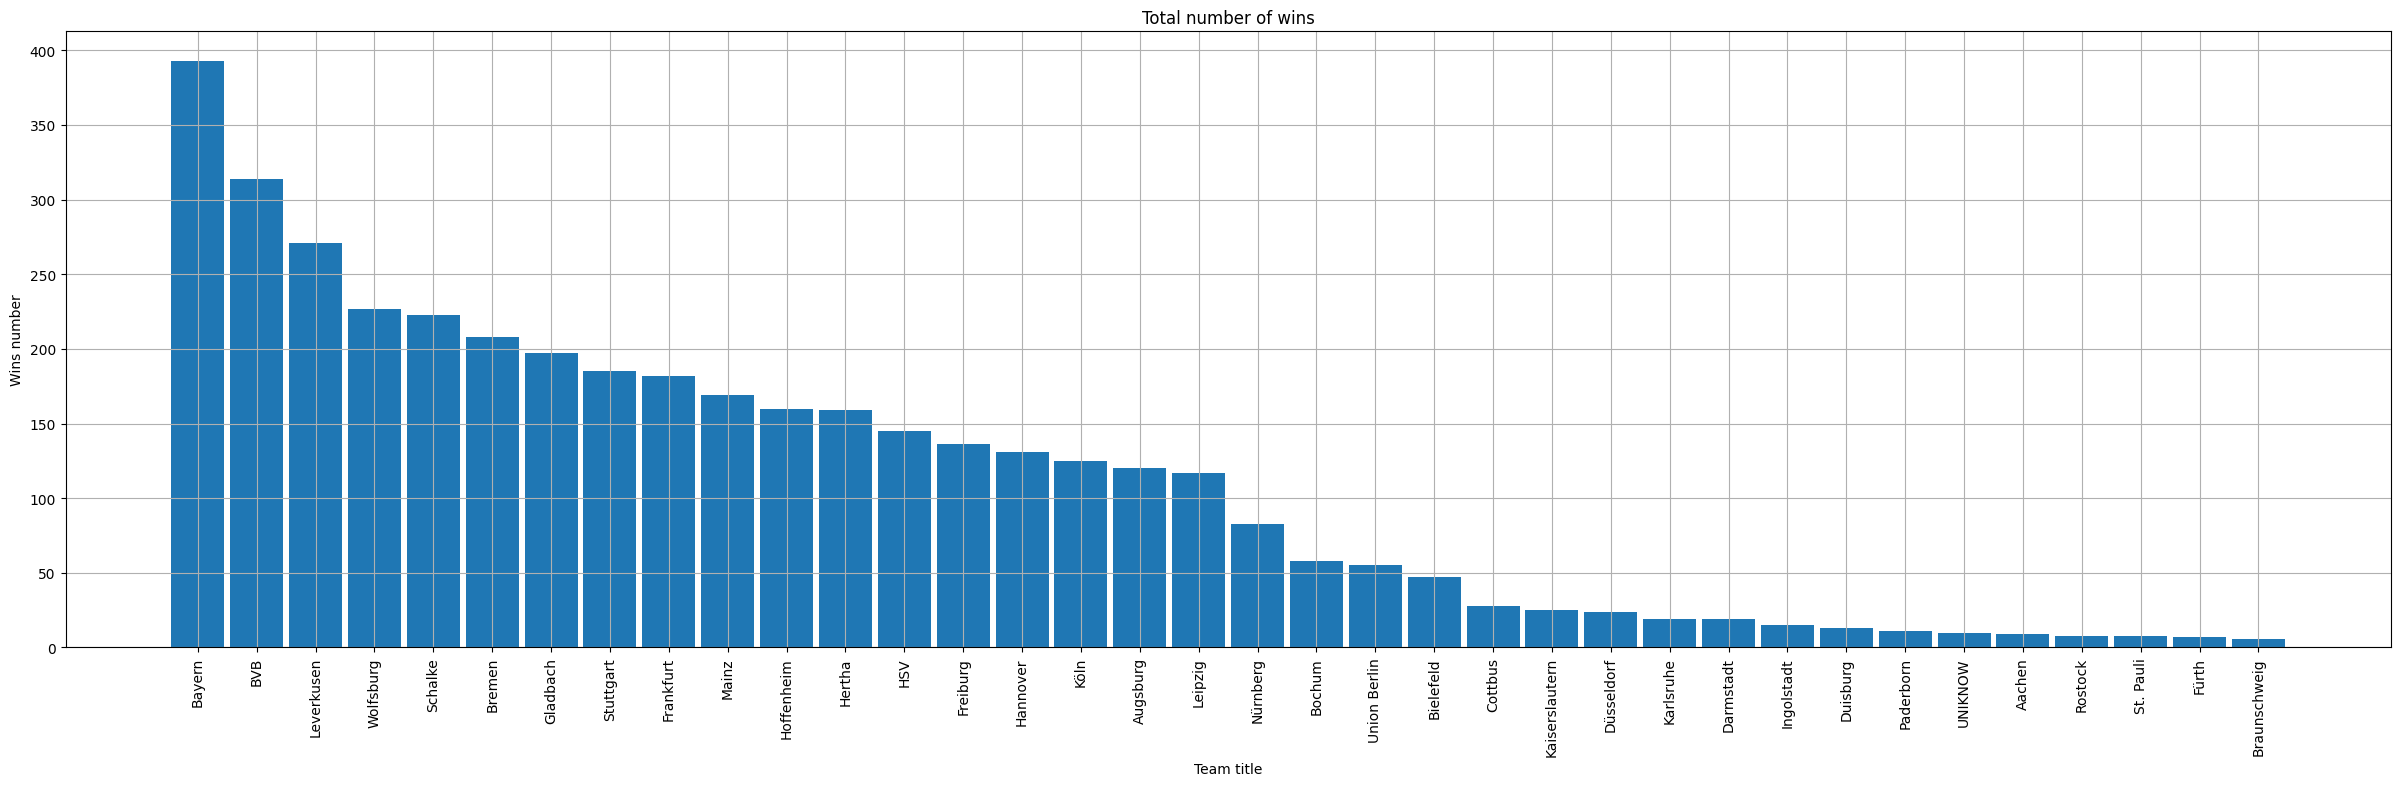

In [14]:
winer_num = df.groupby(['TEAM'])['IS_WIN'].sum()
winer_num.sort_values(inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(30, 8))
ax.bar(winer_num.keys(), winer_num.values, width = 0.9)
ax.set_xticklabels(labels=winer_num.keys(), rotation='vertical')
ax.set_title('Total number of wins')
ax.set_xlabel('Team title')
ax.set_ylabel('Wins number')
ax.grid()

In [15]:
winer_num = df.pivot_table(
    'IS_WIN',
    index='TEAM',
    columns='IS_HOME_GAME',
    aggfunc='sum'
)
winer_num.rename(columns={False: 'Home', True: 'Away'}, inplace=True)

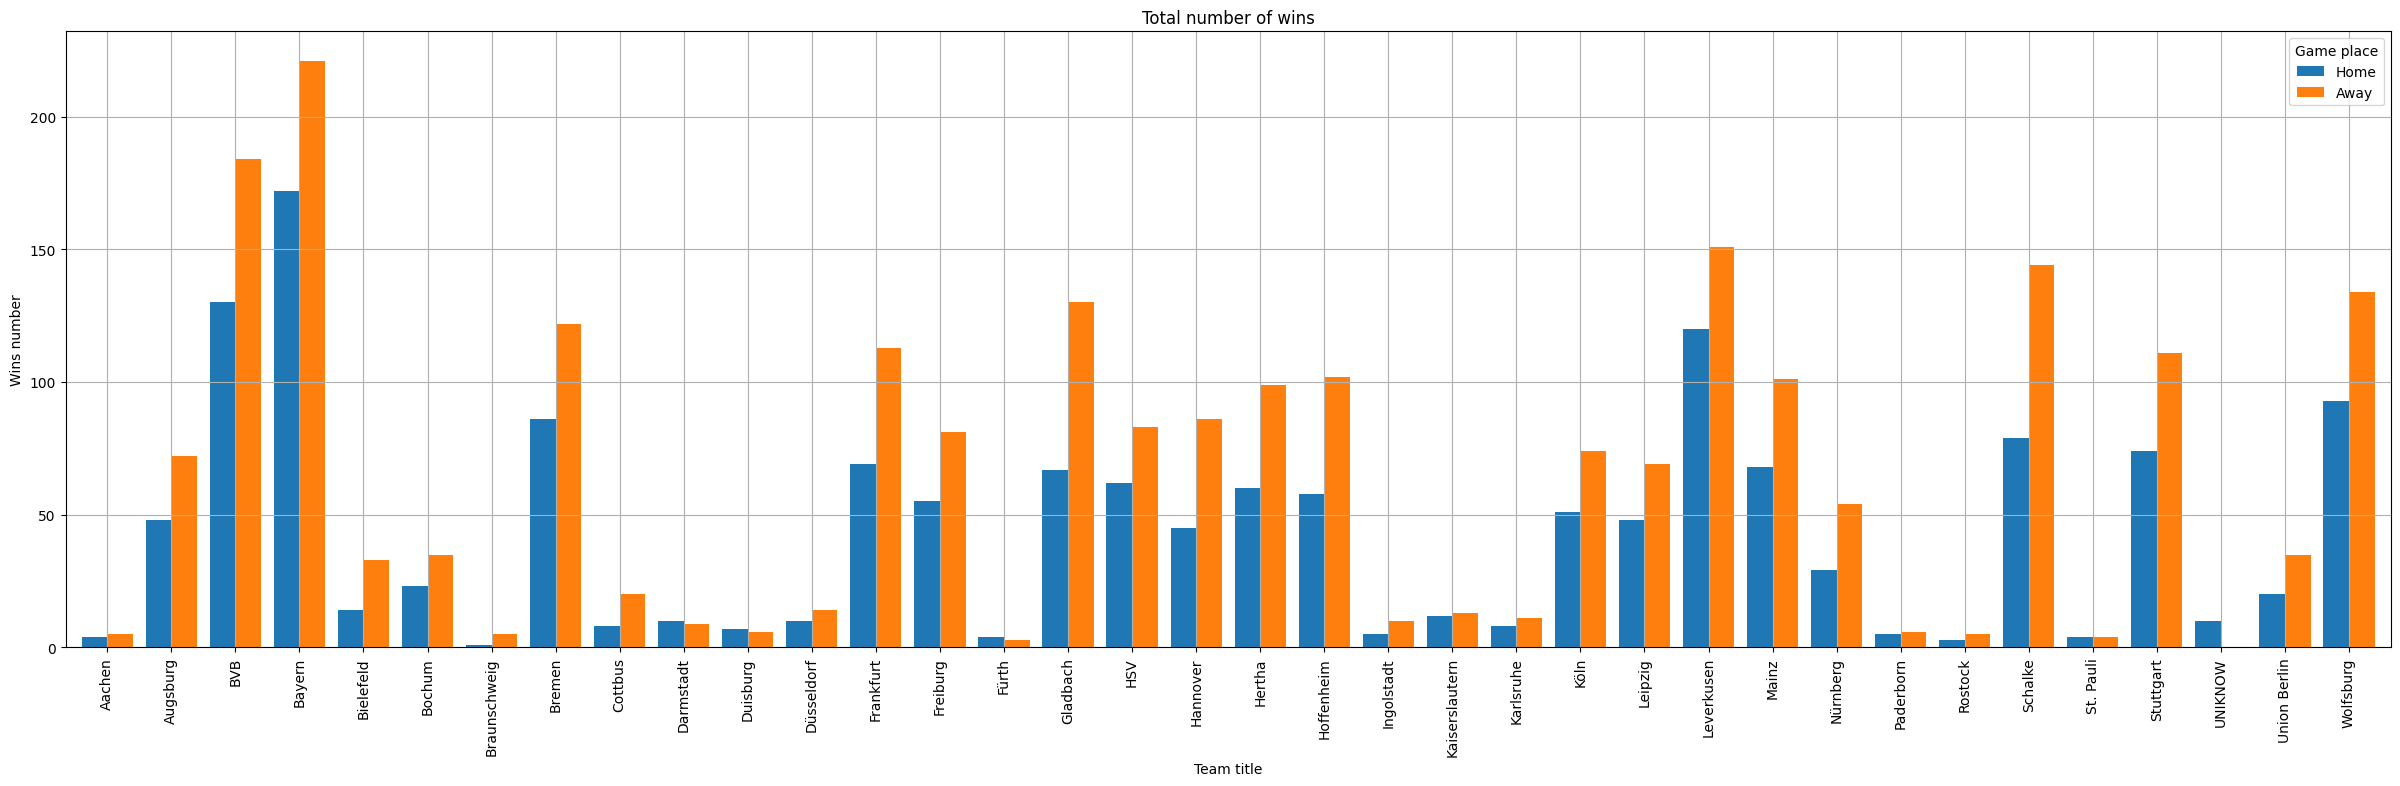

In [16]:
fig, ax = plt.subplots(figsize=(30, 8))
winer_num.plot(kind='bar', ax=ax, width = 0.8)
ax.set_title('Total number of wins')
ax.set_xlabel('Team title')
ax.set_ylabel('Wins number')
ax.legend(title='Game place')
ax.grid()

In [17]:
winer_num = df.pivot_table(
    'IS_WIN',
    index='YEAR',
    columns='TEAM',
    aggfunc='count'
)
winer_num.fillna(0, inplace=True)
winer_num.reset_index(inplace=True)
winer_num.set_index('YEAR', inplace=True)

In [18]:
winer_num.head()

TEAM,Aachen,Augsburg,BVB,Bayern,Bielefeld,Bochum,Braunschweig,Bremen,Cottbus,Darmstadt,...,Mainz,Nürnberg,Paderborn,Rostock,Schalke,St. Pauli,Stuttgart,UNIKNOW,Union Berlin,Wolfsburg
YEAR,,,,,,,,,,,,,,,,,,,,,
2005,0.0,0.0,17.0,17.0,17.0,0.0,0.0,17.0,0.0,0.0,...,17.0,17.0,0.0,0.0,17.0,0.0,17.0,0.0,0.0,17.0
2006,17.0,0.0,34.0,34.0,34.0,17.0,0.0,34.0,17.0,0.0,...,34.0,34.0,0.0,0.0,34.0,0.0,34.0,0.0,0.0,34.0
2007,17.0,0.0,34.0,34.0,34.0,34.0,0.0,34.0,34.0,0.0,...,17.0,34.0,0.0,17.0,34.0,0.0,34.0,0.0,0.0,34.0
2008,0.0,0.0,34.0,34.0,34.0,34.0,0.0,34.0,34.0,0.0,...,0.0,17.0,0.0,17.0,34.0,0.0,34.0,0.0,0.0,34.0
2009,0.0,0.0,34.0,34.0,17.0,34.0,0.0,34.0,17.0,0.0,...,17.0,17.0,0.0,0.0,34.0,0.0,34.0,0.0,0.0,34.0


In [19]:
row_sum = winer_num.sum(axis=1)
winer_num_rel = winer_num.apply(lambda x: x / row_sum)

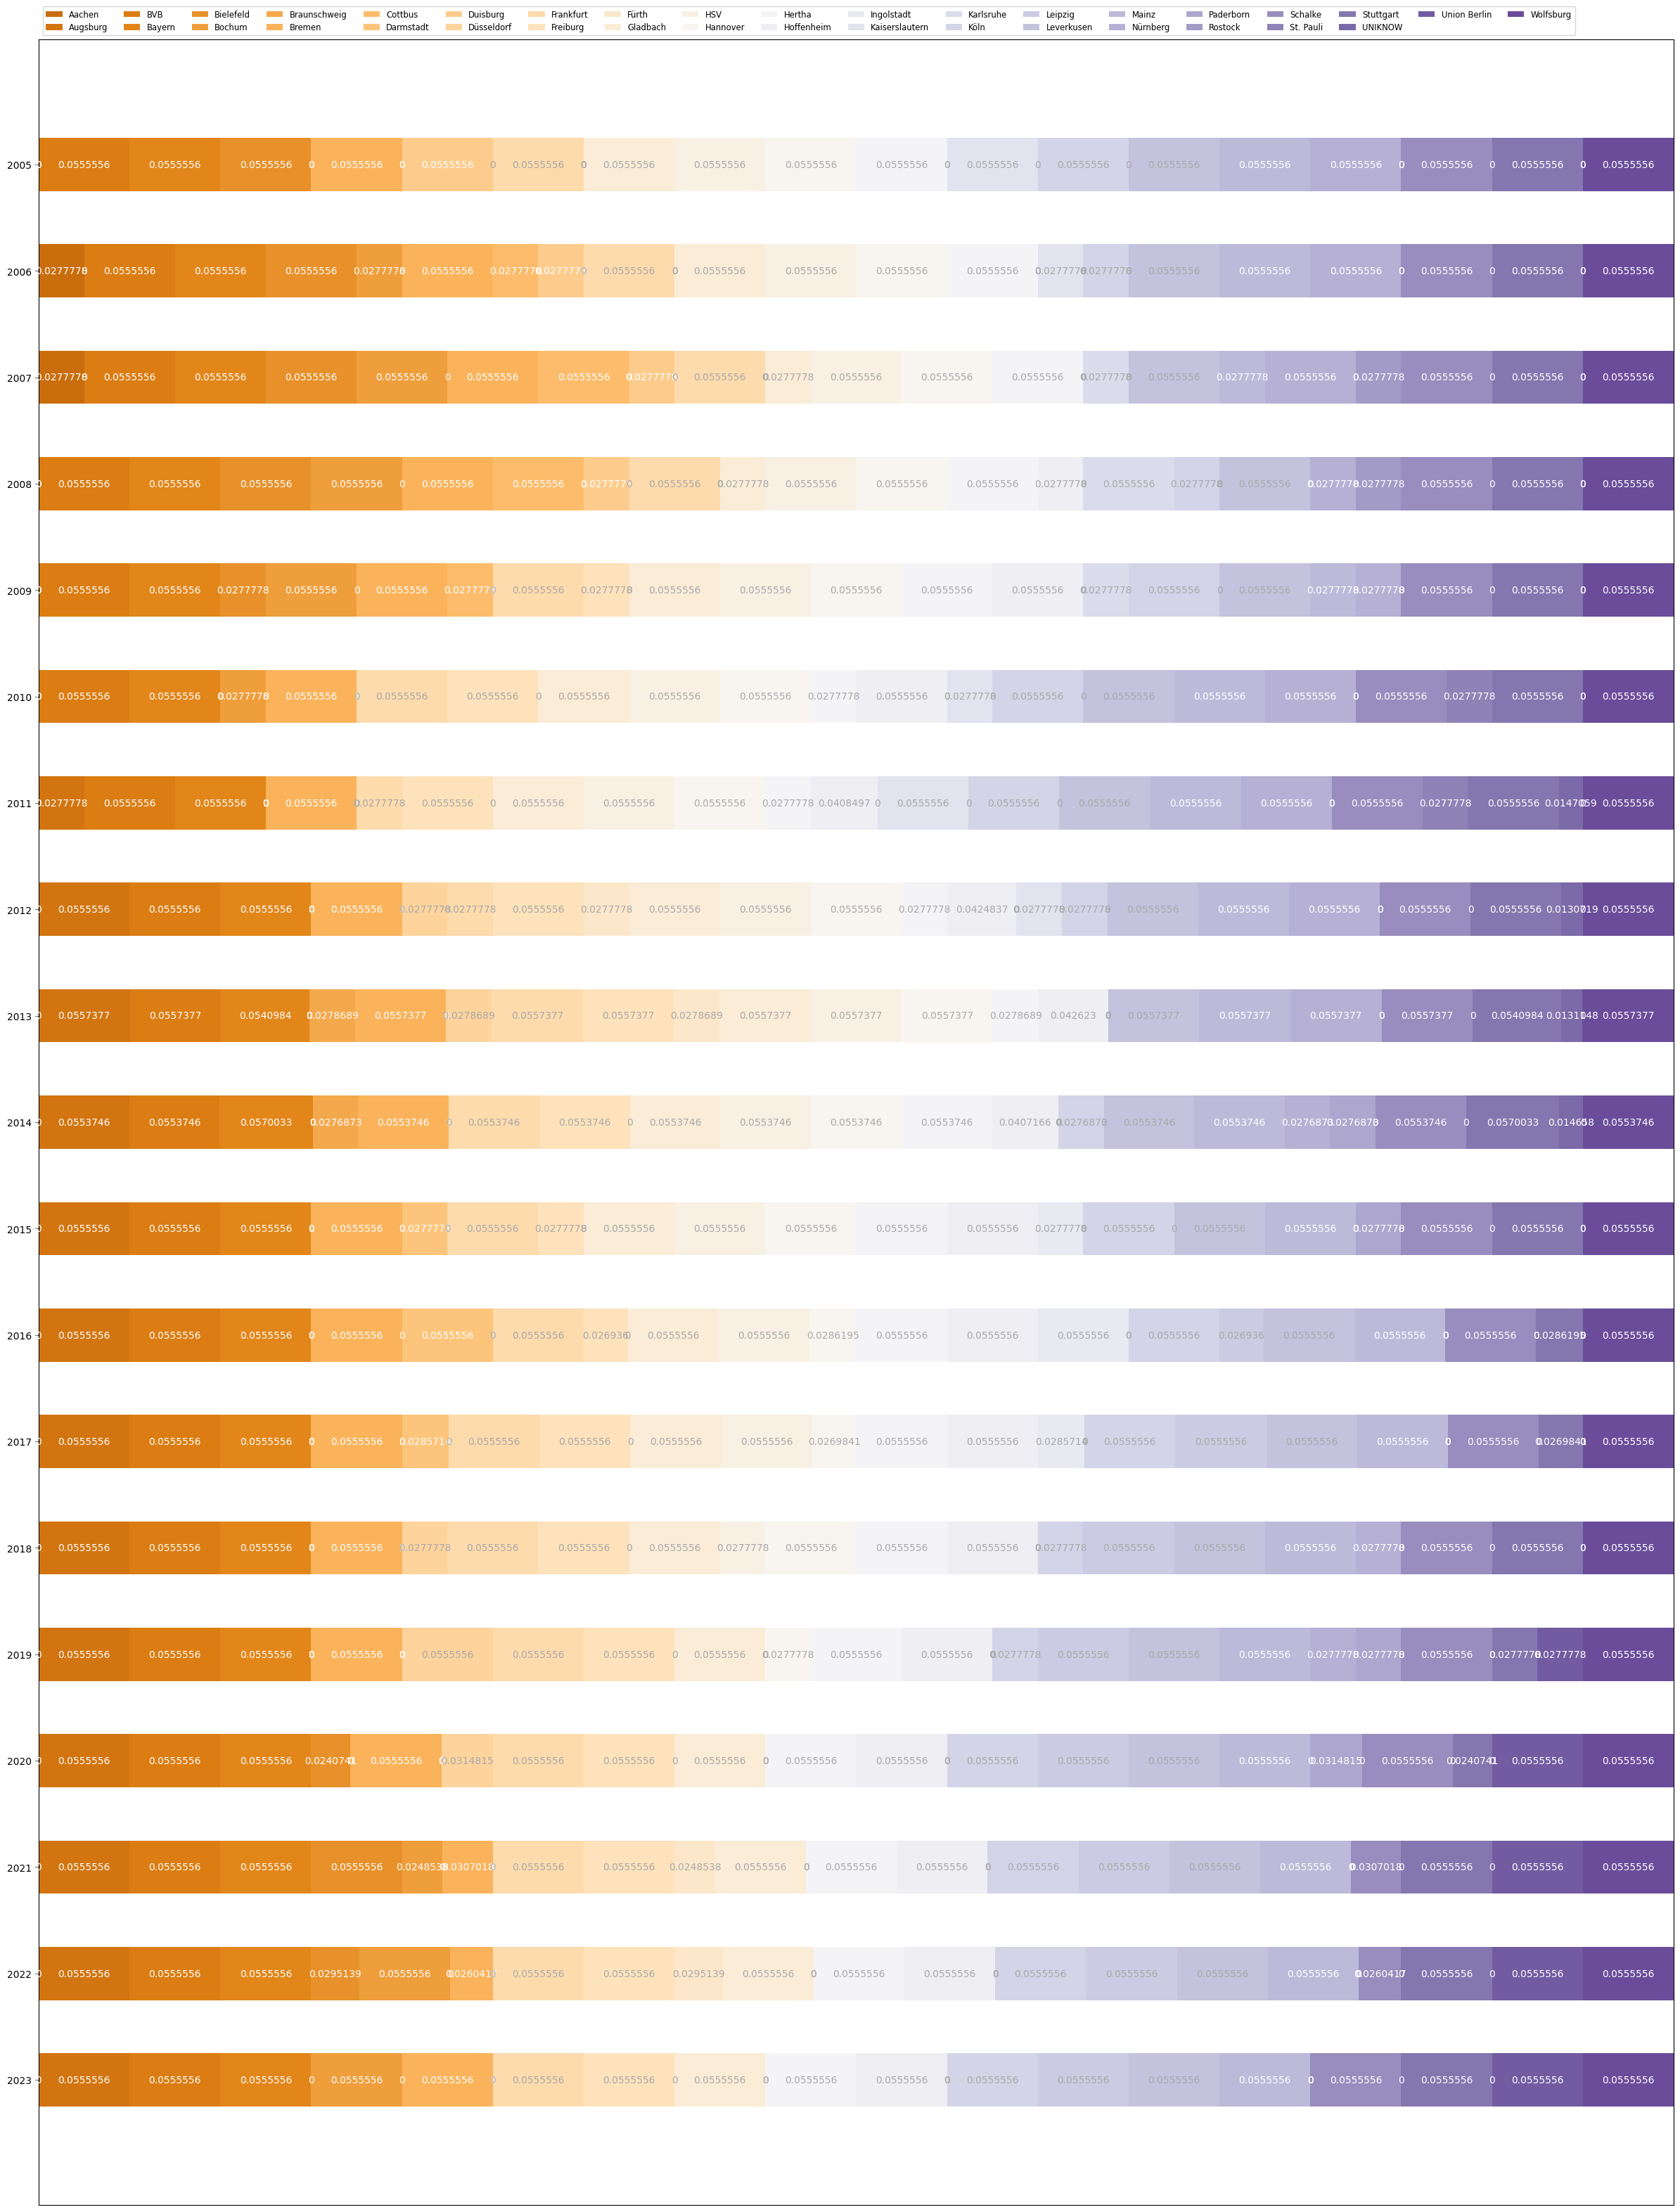

In [20]:
fig, ax = plt.subplots(figsize=(30, 40))
ax.invert_yaxis()

labels = list(str(i) for i in winer_num_rel.index)
data = np.array(list(winer_num_rel.values))
data_cum = data.cumsum(axis=1)
category_colors = plt.colormaps['PuOr'](np.linspace(0.15, 0.85, data.shape[1]))

ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(winer_num_rel.columns, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5, label=colname, color=color)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.bar_label(rects, label_type='center', color=text_color)
ax.legend(ncols=len(winer_num_rel.index), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')

In [21]:
def get_season(date_time):
    match date_time.month_name():
        case 'December' | 'January' | 'February':
            return 'Winter'
        case 'March' | 'April' | 'May':
            return 'Spring'
        case 'June' | 'August' | 'July':
            return 'Summer'
        case 'September' | 'October' | 'November':
            return 'Autumn'
        

In [22]:
df['YEAR_SEASON'] = df['MATCH_DATE'].apply(get_season)

In [23]:
df['MATCH_DATE'].dt.hour.value_counts()

MATCH_DATE
15    7062
20    1622
18    1126
17    1116
19      48
13      40
21       2
Name: count, dtype: int64

In [24]:
df.head()

,MATCH_DATE,LEAGUE_NAME,LOCATION,MATCHDAY,MATCHDAY_NR,TEAM,RIVAl,TEAM_GOALS_NUM,RIVAl_GOALS_NUM,DRAW,IS_WIN,IS_HOME_GAME,YEAR,YEAR_SEASON
0,2005-08-05 20:30:00,1. Fussball-Bundesliga 2005/2006,München,1. Spieltag,1,Bayern,Gladbach,3,0,0.0,True,True,2005,Summer
1,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Köln,1. Spieltag,1,Köln,Mainz,1,0,0.0,True,True,2005,Summer
2,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Duisburg,1. Spieltag,1,Duisburg,Stuttgart,1,1,1.0,False,True,2005,Summer
3,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Hamburg,1. Spieltag,1,HSV,Nürnberg,3,0,0.0,True,True,2005,Summer
4,2005-08-06 15:30:00,1. Fussball-Bundesliga 2005/2006,Wolfsburg,1. Spieltag,1,Wolfsburg,BVB,2,2,1.0,False,True,2005,Summer


In [25]:
df['MATCHDAY'].value_counts()

MATCHDAY
1. Spieltag     324
26. Spieltag    324
20. Spieltag    324
21. Spieltag    324
22. Spieltag    324
23. Spieltag    324
24. Spieltag    324
25. Spieltag    324
27. Spieltag    324
2. Spieltag     324
28. Spieltag    324
29. Spieltag    324
30. Spieltag    324
31. Spieltag    324
32. Spieltag    324
33. Spieltag    324
19. Spieltag    324
18. Spieltag    324
17. Spieltag    324
16. Spieltag    324
15. Spieltag    324
14. Spieltag    324
13. Spieltag    324
12. Spieltag    324
11. Spieltag    324
10. Spieltag    324
9. Spieltag     324
8. Spieltag     324
7. Spieltag     324
6. Spieltag     324
5. Spieltag     324
4. Spieltag     324
3. Spieltag     324
34. Spieltag    324
Name: count, dtype: int64

In [26]:
df.loc[:, df.columns !='IS_WIN'].columns

Index(['MATCH_DATE', 'LEAGUE_NAME', 'LOCATION', 'MATCHDAY', 'MATCHDAY_NR',
       'TEAM', 'RIVAl', 'TEAM_GOALS_NUM', 'RIVAl_GOALS_NUM', 'DRAW',
       'IS_HOME_GAME', 'YEAR', 'YEAR_SEASON'],
      dtype='object')